# GTZAN Genre Collection: Construir un clasificado


El [dataset](http://marsyas.info/downloads/datasets.html) consta de 1000 audios de 30 segundos en formato .wav de 10 géneros musicales distintos.

> Tarea: Construir un clasificador

¿Qué tan bien funciona en validación (10% random de cada género)? 
¿Qué features usar?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
import librosa
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, roc_curve

# Analiso la data

Cargo los espectogramas correspondientes a cada cancion como data_set y tomo como label la carpeta a la que pertenece dicha cancion.

Tomo las primeras 10 canciones de cada genero como parte de mi test_set y las 90 canciones restantes luego las separo en train_set y validation_set

In [2]:
from glob import glob

base = "genres/"
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

Analizando la data observamos que no todas las canciones duran exactamente 30 segundos, eso trae como consecuencia que las señales recibidas (sig) sea ligeramente distinto haciendo que los tiempos cambien para cada cancion.

Para solucionar este problema, truncamos las señales para que considere las correspondiente a 29.9 segundos

In [3]:
data = np.empty((0,5886), float)
data_test = np.empty((0,5886), float)

labels = []
labels_test = []

max_len_of_songs= int(29.9*22050*2)

for genre in tqdm(genres):
    
    path = base+genre
    songs = sorted(glob(path+"/*.wav"))
    for k, song in enumerate(songs[:]):
        
        sig, rate = librosa.load(song,sr=22050*2)
        frequencies, times, spectrogram = signal.spectrogram(sig[:max_len_of_songs],rate)
        
        if k >= 10:
            data = np.concatenate((data, spectrogram.T.mean(axis=1).reshape(1,5886)), axis=0)
            labels.extend([genre])
        else:
            data_test = np.concatenate((data_test, spectrogram.T.mean(axis=1).reshape(1,5886)), axis=0)
            labels_test.extend([genre])

100%|██████████| 10/10 [15:50<00:00, 95.07s/it]


In [4]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,5876,5877,5878,5879,5880,5881,5882,5883,5884,5885
0,2.238875e-06,1.037237e-06,2.203183e-06,2.712548e-06,1.569723e-06,1.242984e-06,2.279165e-06,1.922800e-06,2.116325e-06,2.797039e-06,...,1.789646e-07,1.636445e-07,1.782794e-07,2.284478e-07,1.815005e-07,1.864456e-07,1.142014e-07,6.331630e-08,1.132182e-07,8.257041e-08
1,3.653466e-08,1.310547e-07,9.800927e-08,6.105414e-08,1.069834e-07,5.709834e-08,1.469337e-07,7.911495e-08,1.267696e-07,1.093936e-07,...,1.033268e-07,2.687472e-07,8.691077e-07,9.687213e-07,1.069851e-06,8.062119e-07,8.444222e-08,5.916943e-07,9.249194e-07,6.703698e-07
2,6.002224e-07,7.443720e-07,8.619202e-07,7.533689e-07,5.858706e-07,5.166179e-07,4.787922e-07,5.842786e-07,5.015228e-07,3.825638e-07,...,1.601867e-06,7.993848e-07,2.732875e-06,1.012836e-06,7.027735e-07,1.860945e-06,5.845715e-07,6.013610e-07,7.765065e-07,9.313830e-07
3,2.820408e-07,5.260800e-07,4.192725e-07,2.428252e-07,2.191517e-07,3.528003e-07,2.057803e-07,3.244559e-07,2.732166e-07,1.348755e-07,...,7.851027e-07,2.561371e-07,2.257331e-07,6.149986e-07,4.621291e-07,6.081410e-08,2.495417e-07,2.070650e-07,1.082681e-07,1.311098e-07
4,1.006129e-07,1.579804e-07,1.617790e-07,2.584490e-07,1.243629e-07,7.726150e-08,8.413748e-08,1.878644e-07,1.516573e-07,8.169071e-08,...,7.266732e-08,2.109666e-08,5.132869e-08,1.183902e-08,2.670680e-08,7.997687e-08,7.938014e-08,8.497867e-08,1.286427e-07,2.307332e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1.627457e-07,4.958352e-08,2.907965e-07,1.152614e-07,1.329753e-07,9.542887e-08,1.478833e-07,2.538444e-07,1.497487e-07,1.243410e-07,...,7.967280e-07,6.743305e-07,1.052264e-07,5.774848e-08,4.235331e-07,6.370144e-07,2.470796e-07,1.642042e-07,4.416375e-07,3.246522e-07
896,1.754109e-07,4.148319e-08,1.404240e-07,2.172317e-07,6.597973e-08,8.685821e-08,8.817978e-08,1.397334e-07,6.215356e-08,1.209817e-07,...,2.535671e-07,1.118602e-07,2.368717e-07,1.401981e-07,1.738785e-07,1.662833e-07,2.236996e-07,5.675599e-07,3.881732e-07,6.266933e-07
897,1.472436e-07,1.546431e-07,1.496673e-07,1.223550e-07,1.166560e-07,2.610253e-07,3.850837e-07,5.153171e-07,3.444539e-07,1.969779e-07,...,2.713154e-07,2.204941e-07,3.854310e-07,1.644210e-07,2.509224e-07,1.943184e-07,2.556744e-07,1.691993e-07,2.398032e-07,1.362089e-07
898,6.537824e-07,3.469033e-07,1.223116e-06,9.263332e-07,1.138290e-06,8.491681e-07,1.350406e-06,9.140412e-07,7.744658e-07,1.370563e-07,...,6.083109e-08,4.899170e-08,2.247567e-07,6.398405e-08,6.038002e-08,2.752822e-07,1.489911e-07,1.725310e-08,2.944608e-07,2.677312e-07


In [5]:
# Verifico que la matriz no tenga valores nulos
pd.DataFrame(data).isna().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
895    0
896    0
897    0
898    0
899    0
Length: 900, dtype: int64

In [6]:
pd.DataFrame(labels)

,0
0,blues
1,blues
2,blues
3,blues
4,blues
...,...
895,rock
896,rock
897,rock
898,rock


# Separo la data de entrenamiento y la de validacion

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split( data, labels, test_size=0.1, random_state=42 )

# Propongo el baseline

Usaremos como baseline RandomForestClasification.

Este modelo tiene como ventaja que puede clasificar directamente entre un grupo de multiples clases.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest_clf = RandomForestClassifier(random_state=42,  n_jobs=-1, verbose=0, n_estimators=1024, criterion="entropy", 
                                    max_depth=32, min_samples_leaf=0.01, max_features = 0.2)

In [9]:
forest_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=32, max_features=0.2,
                       min_samples_leaf=0.01, n_estimators=1024, n_jobs=-1,
                       random_state=42)

# Metricas

In [24]:
from sklearn.metrics import roc_auc_score, accuracy_score

print("Exactitud en set de entrenamiento: ", accuracy_score(forest_clf.predict(x_train), y_train)*100)
print("Exactitud en set de validación: ", accuracy_score(forest_clf.predict(x_val), y_val)*100)
print("Exactitud en set de prueba: ", accuracy_score(forest_clf.predict(data_test), labels_test)*100)

Exactitud en set de entrenamiento:  90.49382716049382
Exactitud en set de validación:  25.555555555555554
Exactitud en set de prueba:  27.0


/home/paredesj/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Matriz de confusion con train_set')

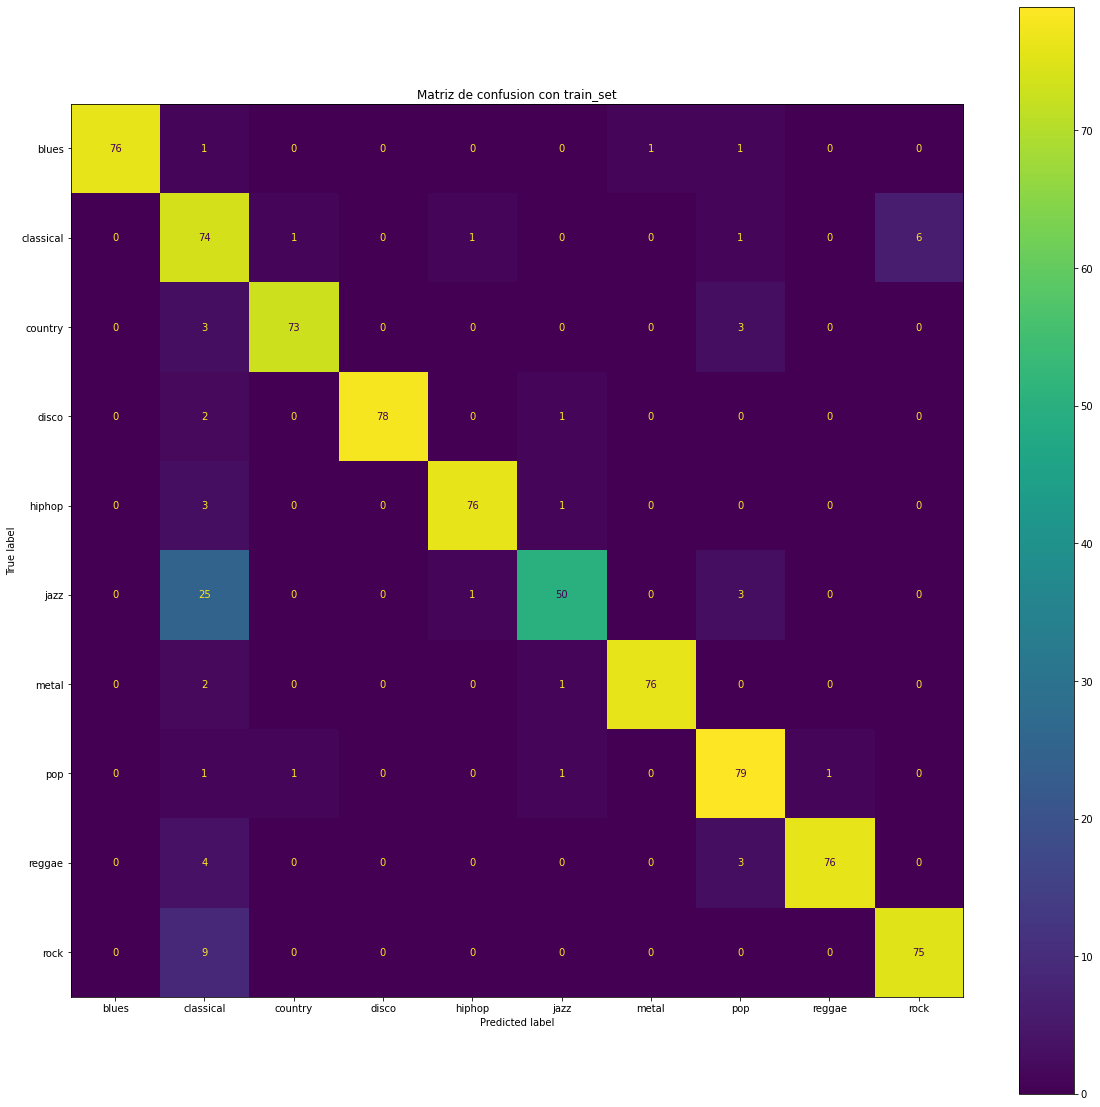

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_confusion_matrix

fig, ax = plt.subplots(figsize=(20, 20))

plot_confusion_matrix(forest_clf, x_train, y_train, ax=ax)
ax.set_title('Matriz de confusion con train_set')

/home/paredesj/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Matriz de confusion con validation_set')

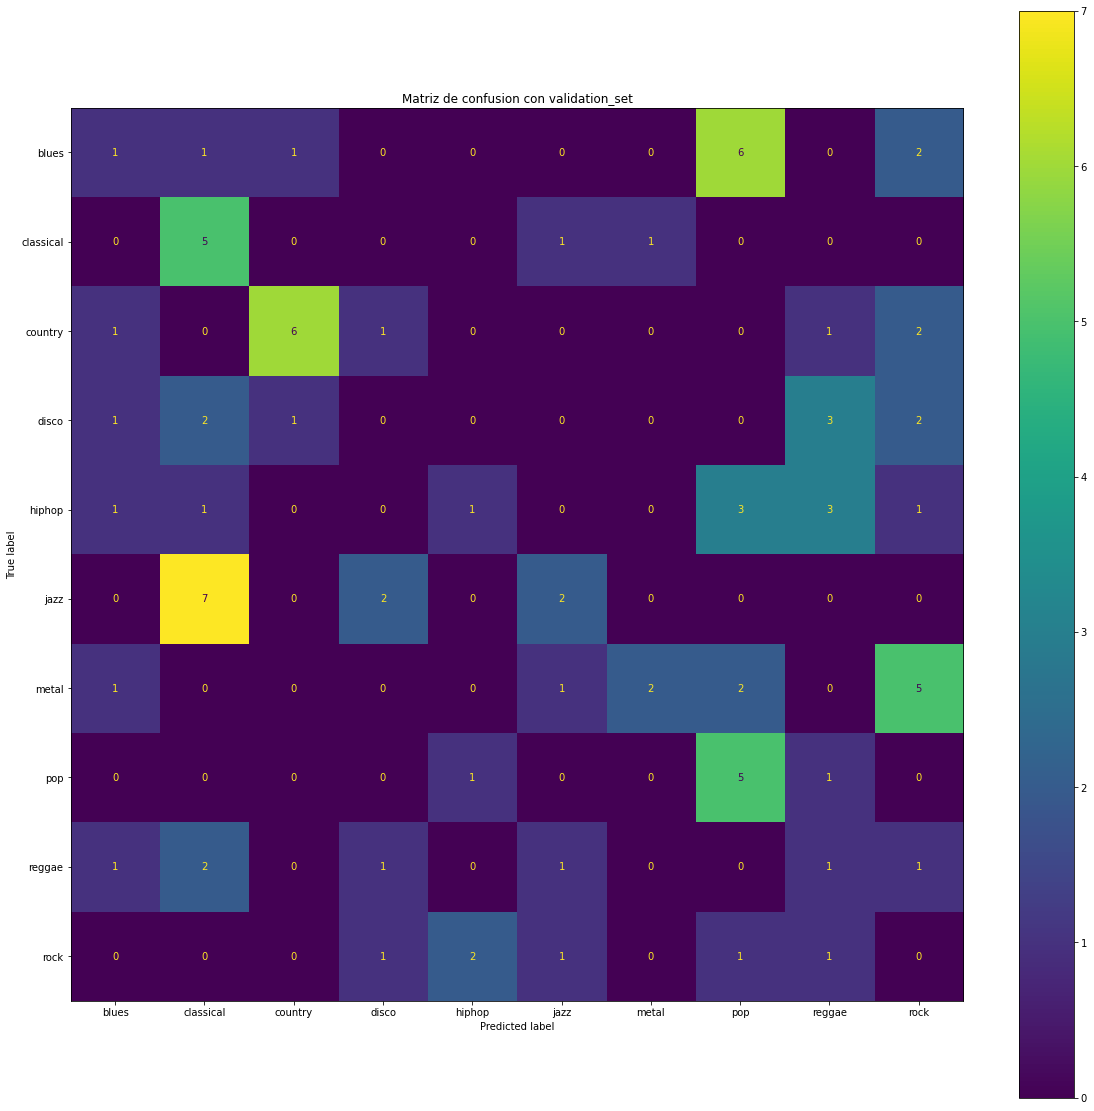

In [26]:
fig, ax = plt.subplots(figsize=(20, 20))

plot_confusion_matrix(forest_clf, x_val, y_val, ax=ax)
ax.set_title('Matriz de confusion con validation_set')

/home/paredesj/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Matriz de confusion con test_set')

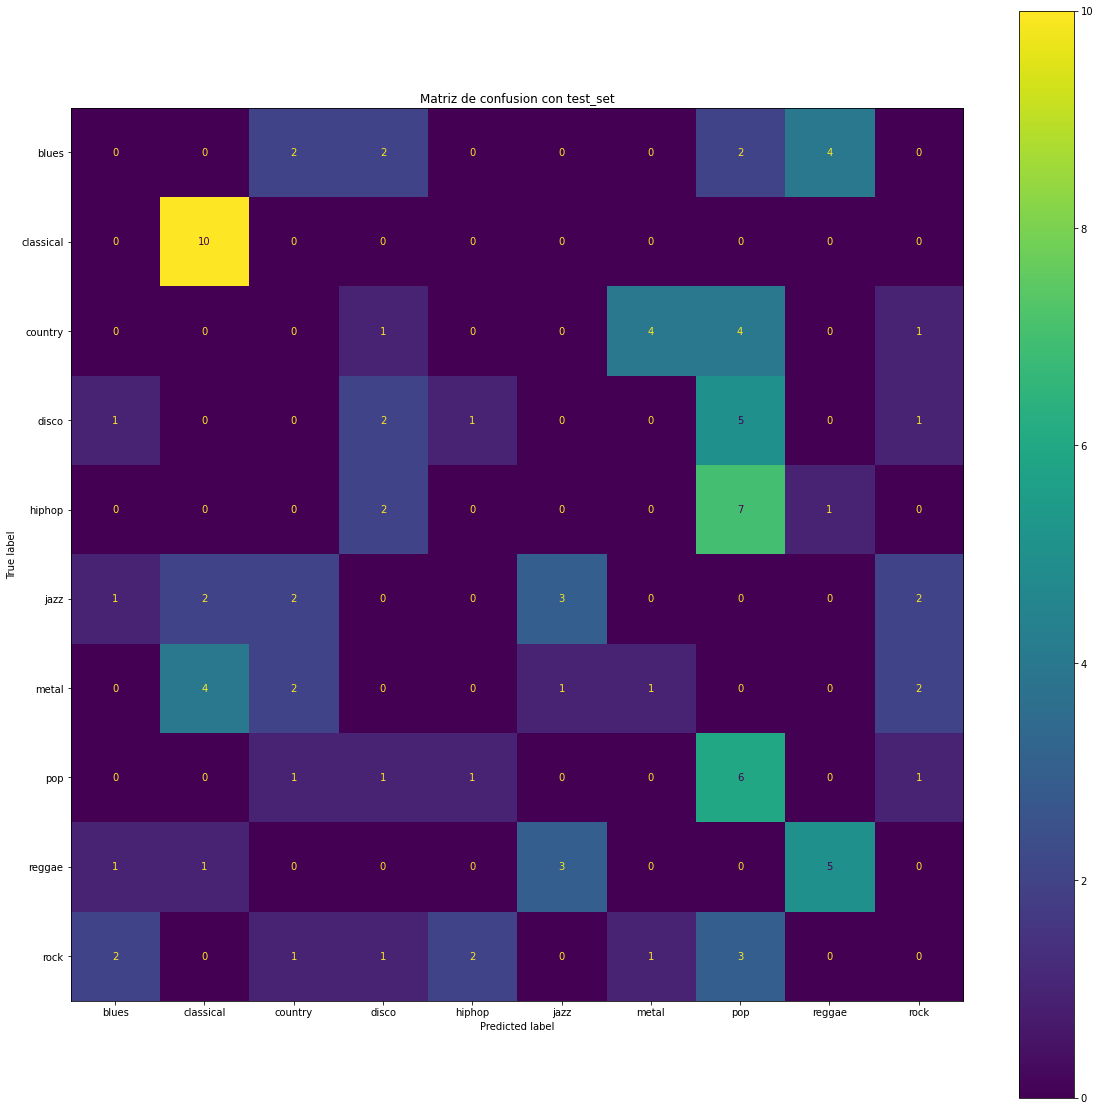

In [27]:
fig, ax = plt.subplots(figsize=(20, 20))

plot_confusion_matrix(forest_clf, data_test, labels_test, ax=ax)
ax.set_title('Matriz de confusion con test_set')

# Conclusiones

El baseline nos da resultados poco exactos como consecuencia de que tenemos una muestra muy pequeña para entrenar. 

Para 1000 canciones de 30 segundos, tomando las primeras 10 canciones de cada genero y luego asignando el 10% como data_validation, nos queda un modelo con 810 canciones. Visto desde el punto de vista de la densidad de data, tenemos solamente 810 registros con 5886 features cada uno las cuales corresponden al promedio de la frecuencia para cada instante de la cancion. 

Para poder tener un mejor modelo se necesariamente se deben tener muchas mas muestras de canciones por genero.

Usando la matriz de confusion vemos que el modelo tiene especial dificultad con el genero de musica clasica. Aunque por lo general observamos que tienen buenos valores en las diagonales. 